### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

<function matplotlib.pyplot.show(close=None, block=None)>

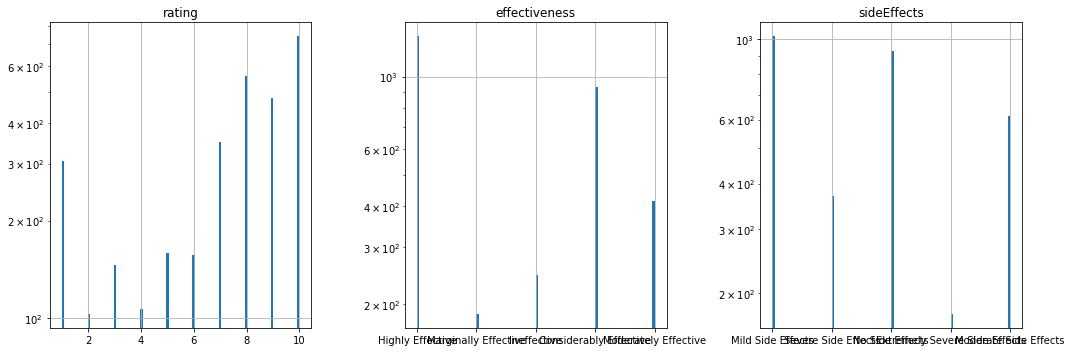

In [39]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

#### Muestra en un grafico de quesito la distribución de los distintos clusters